K-means clustering from scratch

In [53]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import k_means

1. Let's generate some data

In [14]:
centers = [[1, 1], [-1, -1], [1, -1]]
data, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

data = StandardScaler().fit_transform(data)

In [17]:
# Handle missing values by replacing them with column medians

# Assuming 'data' is a 2D NumPy array
num_columns = data.shape[1]

for i in range(num_columns):
    column = data[:, i]
    
    # Filter out NaN values for median calculation
    non_nan_column = column[~np.isnan(column)]
    
    # Calculate the median using NumPy's built-in function
    median_value = np.median(non_nan_column)
    
    # Replace NaN values with the computed median
    column[np.isnan(column)] = median_value

    # Update the data array with the modified column
    data[:, i] = column

In [18]:
print(data)

[[ 0.49426097  1.45106697]
 [-1.42808099 -0.83706377]
 [ 0.33855918  1.03875871]
 ...
 [-0.05713876 -0.90926105]
 [-1.16939407  0.03959692]
 [ 0.26322951 -0.92649949]]


In [57]:
# Set the number of clusters (K)
K = 3

# Assuming 'data' is a 2D NumPy array
min_values = np.min(data, axis=0)
max_values = np.max(data, axis=0)

# Initialize centroids randomly between the minimum and maximum values of each column
initial_centroids = np.random.rand(K, data.shape[1]) * (max_values - min_values) + min_values


/var/folders/bx/z6474k1x4hl7tmn54rd53x3m0000gn/T/ipykernel_75689/2740155191.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1],  s=50, cmap='viridis', marker='o')


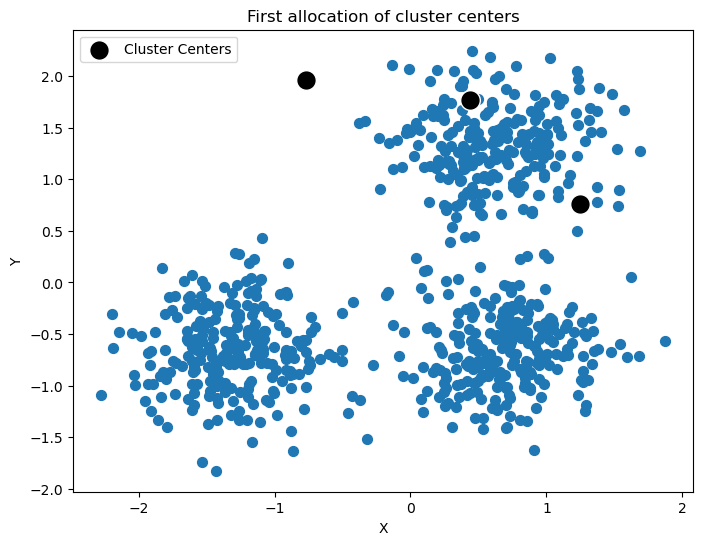

In [59]:
plt.figure(figsize=(8, 6))
# Scatter plot of data points, colored by their cluster
plt.scatter(data[:, 0], data[:, 1],  s=50, cmap='viridis', marker='o')

# Scatter plot for cluster centers
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='k', s=200, label='Cluster Centers', edgecolor='white')

# Add title, labels, and legend
plt.title('First allocation of cluster centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Display the plot
plt.show()

Recipe:

1. Initiate centroids
2. Calculate distance of all data points to each centroid
3. Assign each data point to closest centroid
4. Calculate new centroid
5. Repeat 2-4

In [49]:
# K-means parameters
max_iterations = 300
tolerance = 1e-4

# Function to calculate Euclidean distance
def calculate_euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# K-means clustering algorithm
for iter in range(max_iterations):
    # Assignment step: Calculate the distances and assign clusters
    distances = np.zeros((data.shape[0], K))
    
    for i in range(data.shape[0]):
        for j in range(K):
            distances[i, j] = calculate_euclidean_distance(data[i, :], initial_centroids[j, :])
    
    # Get the index of the nearest centroid for each data point
    cluster_indices = np.argmin(distances, axis=1)
    
    # Update centroids
    new_centroids = np.zeros_like(initial_centroids)
    
    for i in range(K):
        # Get all points assigned to cluster i
        cluster_points = data[cluster_indices == i, :]
        
        if len(cluster_points) > 0:
            new_centroids[i, :] = np.mean(cluster_points, axis=0)
        else:
            # Reinitialize the centroid randomly if no points are assigned
            new_centroids[i, :] = np.random.rand(1, data.shape[1]) * (max_values - min_values) + min_values
    
    # Check for convergence
    if np.max(np.abs(new_centroids - initial_centroids)) <= tolerance:
        break
    
    # Update centroids for the next iteration
    initial_centroids = new_centroids


Final Centroids:
[[ 0.6954587  -0.64442334]
 [-1.30266211 -0.65704205]
 [ 0.62260555  1.3172598 ]]
Cluster Number   Number of Data Points
1               250
2               252
3               248


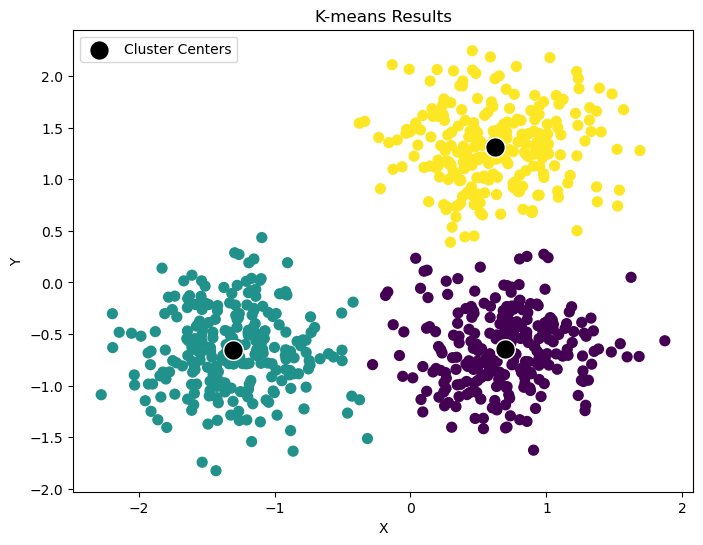

In [50]:
# Display the final centroids
print("Final Centroids:")
print(initial_centroids)

# Count the number of data points in each cluster
num_points_in_clusters = np.bincount(cluster_indices, minlength=K)

# Print results
print("Cluster Number   Number of Data Points")
for i in range(K):
    print(f"{i+1}               {num_points_in_clusters[i]}")

# Visualize data points and cluster centers
plt.figure(figsize=(8, 6))
# Scatter plot of data points, colored by their cluster
plt.scatter(data[:, 0], data[:, 1], c=cluster_indices, s=50, cmap='viridis', marker='o')

# Scatter plot for cluster centers
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='k', s=200, label='Cluster Centers', edgecolor='white')

# Add title, labels, and legend
plt.title('K-means Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Display the plot
plt.show()


Use scikit learn

In [60]:
centroid, label, inertia = k_means(
    data, n_clusters=3, n_init="auto", random_state=0
)

In [61]:
centroid

array([[-1.30266211, -0.65704205],
       [ 0.62260555,  1.3172598 ],
       [ 0.6954587 , -0.64442334]])

Using the elbow method to check the best cluster fit

In [66]:
elbow = list()
for k in range(9):
    centroid, label, inertia = k_means(
            data, n_clusters=k+1, n_init="auto", random_state=0
    )
    elbow.append(inertia)

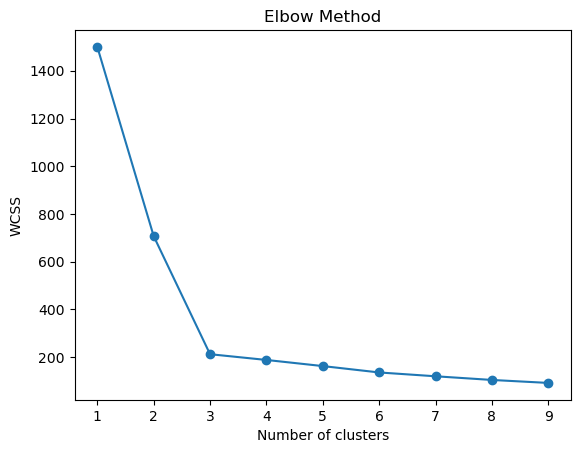

In [67]:
plt.plot(range(1, 10), elbow, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()